In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
iris_df = pd.read_csv('iris.csv')
iris_df.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
112,6.8,3.0,5.5,2.1,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica
52,6.9,3.1,4.9,1.5,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [14]:
iris_df.fillna(iris_df.median(), inplace=True)

In [17]:
iris_df.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_df['Class'] = le.fit_transform(iris_df['Class'])

In [21]:
iris_df.Class.unique()

array([0, 1, 2])

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [22]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [42]:
iris_df.loc[:, (iris_df.corr()['Class'] >= 0.1) | ]

,Sepal Length (in cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


In [40]:
iris_df.loc[:, (iris_df.corr()['Class'] <= -0.1)]

,Sepal Width in (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [44]:
iris_upd_df = pd.DataFrame(iris_df.loc[:, (iris_df.corr()['Class'] >= 0.1) | (iris_df.corr()['Class'] <= -0.1)])

In [45]:
iris_upd_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [48]:
iris_upd_df.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

In [98]:
# There are no such values. BUt we can run the below statement to be on the safer side.
iris_new_df = pd.DataFrame()
print(type(iris_new_df))
iris_new_df = iris_upd_df.loc[:, iris_upd_df.var() >= 0.1]

<class 'pandas.core.frame.DataFrame'>


In [99]:
iris_new_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1df18400>,
      dtype=object)

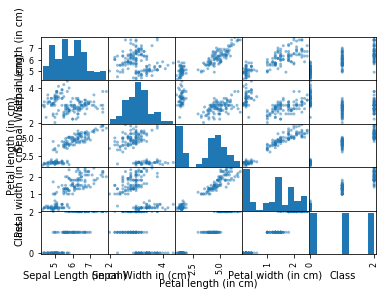

In [109]:
from pandas import plotting
plotting.scatter_matrix(iris_new_df)

In [100]:
import seaborn as sns

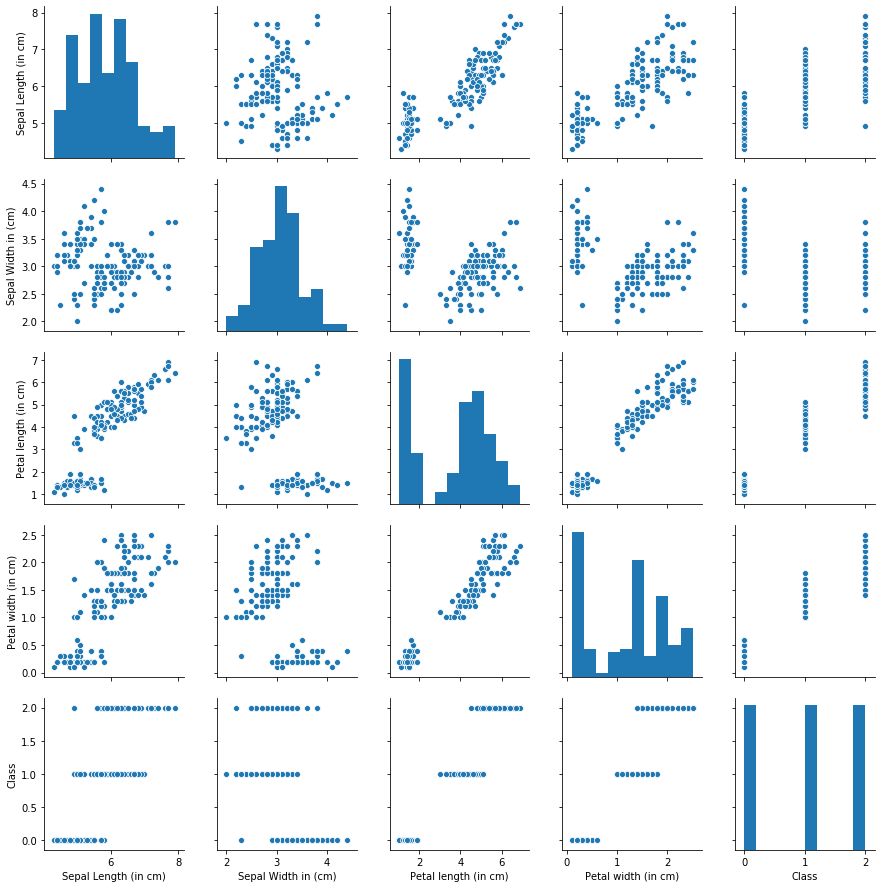

In [101]:
sns.pairplot(iris_new_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [59]:
iris_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [60]:
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target

X = iris_new_df.drop(['Class'], axis=1) 
y = iris_new_df['Class']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [64]:



def predict_accuracy(range):
 for k in range:
    model = KNeighborsClassifier(n_neighbors = k)    
    model.fit(X_train, y_train)                      
    predicted = model.predict(X_test)                   
    print('k = ', k, ' ', 'Accuracy_score = ',accuracy_score(y_test, predicted))            
if __name__ == '__main__':
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    X = [3,5,9]
    predict_accuracy(X)
     

k =  3   Accuracy_score =  1.0
k =  5   Accuracy_score =  1.0
k =  9   Accuracy_score =  0.9666666666666667


## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [95]:
def predict_accuracy(range):
 for k in range:
    model = KNeighborsClassifier(n_neighbors = k)    
    model.fit(X_train, y_train)                      
    predicted = model.predict(X_test)                   
    accuracy = accuracy_score(y_test, predicted)
    mse = 1 - accuracy
    global mse_array
    mse_array.append((mse,k))
#    return optimal_array
if  __name__ == '__main__':
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    mse_array = []
    X = [3,5,9,11,13,15,17,19]
    predict_accuracy(X)
    print(mse_array)
    mse_min, kval = min(mse_array)
    print('optimal k = ', kval, ' and corresponding mse  = ', mse_min)
    
 

[(0.0, 3), (0.0, 5), (0.033333333333333326, 9), (0.033333333333333326, 11), (0.033333333333333326, 13), (0.033333333333333326, 15), (0.033333333333333326, 17), (0.033333333333333326, 19)]
optimal k =  3  and corresponding mse  =  0.0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

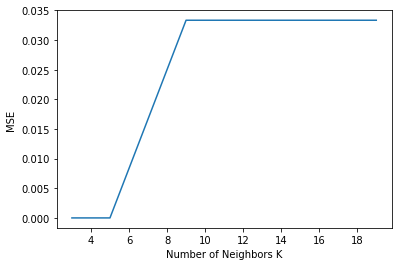

In [97]:
import matplotlib.pyplot as plt

mse, k = zip(*mse_array)
plt.plot(k, mse)
plt.xlabel('Number of Neighbors K')
plt.ylabel('MSE ')
plt.show()